**Performance Analysis of Stock Using Deep Learning Models**

In [ ]:
#Import essential libraries
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import warnings
warnings.filterwarnings('ignore')


**Dataset Collection**

In [ ]:
#Load the dataset
data = pd.read_csv('AAPL523.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-15,1.463214,1.484643,1.445000,1.483929,1.261255,687682800
1,2005-07-18,1.478929,1.503571,1.477500,1.481786,1.259433,586297600
2,2005-07-19,1.482857,1.543929,1.466786,1.542500,1.311036,671062000
3,2005-07-20,1.530714,1.564286,1.523214,1.558214,1.324393,453395600
4,2005-07-21,1.560714,1.572857,1.532143,1.546071,1.314072,404264000
...,...,...,...,...,...,...,...
4484,2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900
4485,2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500
4486,2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700
4487,2023-05-12,173.619995,174.059998,171.000000,172.570007,172.570007,45497800


**Data Preprocessing**

In [ ]:
dataset = pd.read_csv('AAPL523.csv', index_col='Date', parse_dates=['Date'])
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-15,1.463214,1.484643,1.445000,1.483929,1.261255,687682800
2005-07-18,1.478929,1.503571,1.477500,1.481786,1.259433,586297600
2005-07-19,1.482857,1.543929,1.466786,1.542500,1.311036,671062000
2005-07-20,1.530714,1.564286,1.523214,1.558214,1.324393,453395600
2005-07-21,1.560714,1.572857,1.532143,1.546071,1.314072,404264000
...,...,...,...,...,...,...
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.532745,45326900
2023-05-10,173.020004,174.029999,171.899994,173.559998,173.320267,53724500
2023-05-11,173.850006,174.589996,172.169998,173.750000,173.510010,49514700


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4489.000000,4489.000000,4489.000000,4489.000000,4489.000000,4.489000e+03
mean,41.566260,42.035752,41.111517,41.593397,39.979073,4.027627e+08
std,48.101034,48.696328,47.547040,48.150380,48.202301,3.890110e+08
min,1.463214,1.484643,1.445000,1.481786,1.259433,2.604895e+07
25%,7.212143,7.281786,7.116071,7.213929,6.131426,1.134760e+08
50%,23.532499,23.722500,23.260000,23.507500,20.770334,2.610580e+08
75%,47.500000,47.950001,47.134998,47.572498,45.604332,5.759992e+08
max,182.630005,182.940002,179.119995,182.009995,180.434296,3.372970e+09


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4489 entries, 2005-07-15 to 2023-05-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4489 non-null   float64
 1   High       4489 non-null   float64
 2   Low        4489 non-null   float64
 3   Close      4489 non-null   float64
 4   Adj Close  4489 non-null   float64
 5   Volume     4489 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 245.5 KB


In [ ]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(dataset.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(dataset.apply(num_missing, axis=1).head())

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
Date
2005-07-15    0
2005-07-18    0
2005-07-19    0
2005-07-20    0
2005-07-21    0
dtype: int64


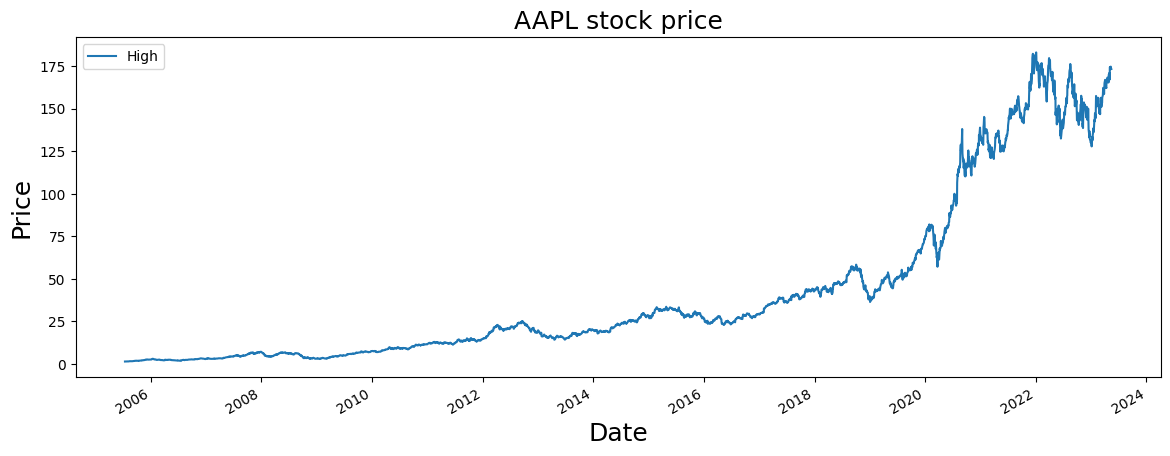

In [ ]:
#dataset graph
dataset["High"].plot(figsize=(14,5),legend=True)
plt.title('AAPL stock price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [ ]:
# train test splitting

In [ ]:
training_set = dataset[:'2020'].iloc[:,1:2].values
test_set = dataset['2021':].iloc[:,1:2].values

In [ ]:
training_set.shape

(3894, 1)

In [ ]:
train_len = training_set.shape[0]
train_len

3894

In [ ]:
test_set.shape

(595, 1)

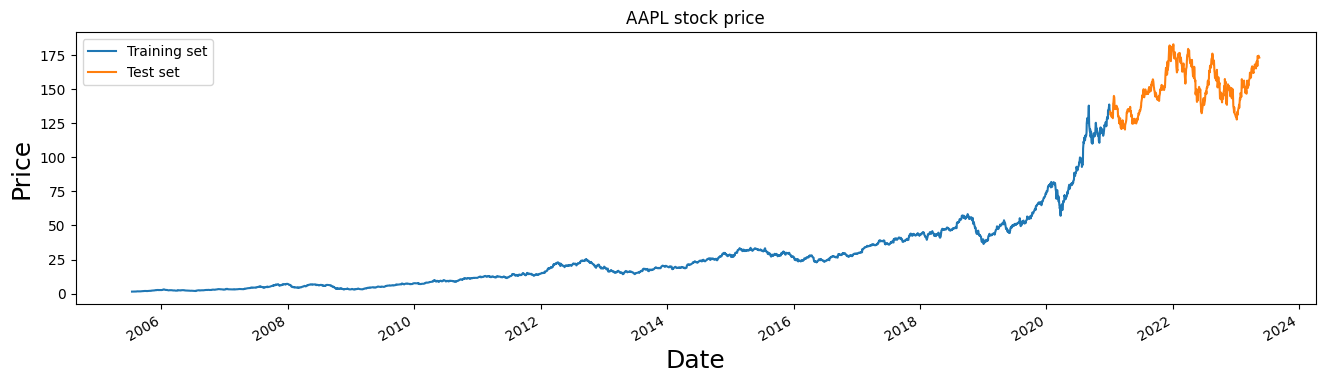

In [ ]:
dataset["High"][:'2020'].plot(figsize=(16,4),legend=True)
dataset["High"]['2021':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.title('AAPL stock price')
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,train_len):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(3834, 60)

In [ ]:
y_train.shape

(3834,)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(3834, 60, 1)

**MLP Model**

In [ ]:
#train the MLP model

In [ ]:
class stock_predict_DL:

    def __init__(self,comp_df):
        # We are taking only the High prices for predicting
        data = comp_df.filter(['High'])
        dataset = data.values
        # We take 85% of the data for training and 15% for testing
        training_data_len = int(np.ceil( len(dataset) * 0.85 ))
        self.scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = self.scaler.fit_transform(dataset)
        # dataset for training
        train_data = scaled_data[0:int(training_data_len), :]
        self.X_train = []
        self.y_train = []
        for i in range(60, len(train_data)):
            self.X_train.append(train_data[i-60:i, 0])
            self.y_train.append(train_data[i, 0])

        # Convert the self.X_train and self.y_train to numpy arrays
        self.X_train, self.y_train = np.array(self.X_train), np.array(self.y_train)

        # Create the testing data set
        test_data = scaled_data[training_data_len - 60: , :]
        self.X_test = []
        self.y_test = dataset[training_data_len:, :]
        for i in range(60, len(test_data)):
            self.X_test.append(test_data[i-60:i, 0])

        # Convert the data to a numpy array
        self.X_test = np.array(self.X_test)
        test_dates = comp_df['Date'].values

    def Mlp_model(self):
        print("Multilayer perceptron (MLP)")
        # We are using MLPRegressor as the problem at hand is a regression problem
        regr = MLPRegressor(hidden_layer_sizes = 100, alpha = 0.01,solver = 'lbfgs',shuffle=True)
        regr.fit(self.X_train, self.y_train)
        # predicting the price
        y_pred = regr.predict(self.X_test)
        y_pred = y_pred.reshape(len(y_pred),1)
        y_pred = self.scaler.inverse_transform(y_pred)
        # calculate error and accuracy
        #mse
        mse = mean_squared_error(self.y_test, y_pred)
        print("The Mean Squared Error is {}.".format(mse))
        #rmse
        rmse = math.sqrt(mean_squared_error(self.y_test, y_pred))
        print("The root mean squared error is {}.".format(rmse))
        #mae
        mae = mean_absolute_error(self.y_test, y_pred)
        print("The Mean Absolute Error of our Model is {}".format(mae))
        #r2 score
        score = r2_score(self.y_test, y_pred)
        # print("The r2_score is {}.".format(score))
        print("The accuracy of our model is {}%".format(round(score, 2) *100))
        # plot the graph
        plt.plot(y_pred, color='red')
        plt.plot(self.y_test, color='blue')
        plt.legend(["Predicted","Observed"])
        plt.xlabel('Date',fontsize=14)
        plt.ylabel('Price',fontsize=14)
        plt.title("MLP",fontsize=19)

Multilayer perceptron (MLP)
The Mean Squared Error is 80.88223286449747.
The root mean squared error is 8.993455001527359.
The Mean Absolute Error of our Model is 7.229646665019355
The accuracy of our model is 73.0%


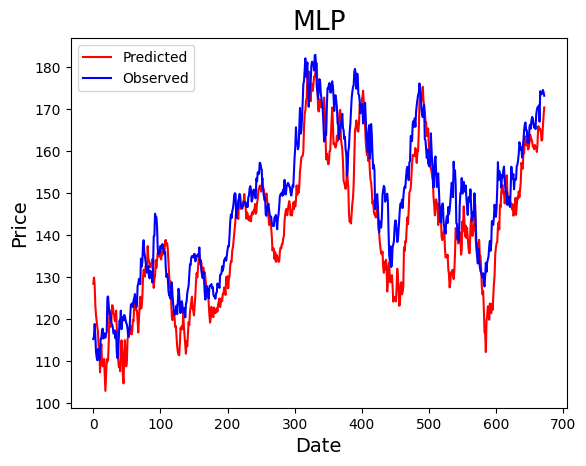

In [ ]:
#MLP results
company_stock = stock_predict_DL(data)
company_stock.Mlp_model()

**LSTM Model**

In [ ]:
#train the LSTM model

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
120/120 [==============================] - 29s 156ms/step - loss: 0.0044
Epoch 2/50
120/120 [==============================] - 18s 152ms/step - loss: 0.0021
Epoch 3/50
120/120 [==============================] - 20s 167ms/step - loss: 0.0016
Epoch 4/50
120/120 [==============================] - 18s 152ms/step - loss: 0.0013
Epoch 5/50
120/120 [==============================] - 20s 165ms/step - loss: 0.0013
Epoch 6/50
120/120 [==============================] - 18s 154ms/step - loss: 0.0010
Epoch 7/50
120/120 [==============================] - 19s 159ms/step - loss: 0.0010
Epoch 8/50
120/120 [==============================] - 18s 154ms/step - loss: 8.8624e-04
Epoch 9/50
120/120 [==============================] - 19s 158ms/step - loss: 9.3444e-04
Epoch 10/50
120/120 [==============================] - 18s 153ms/step - loss: 8.7510e-04
Epoch 11/50
120/120 [==============================] - 18s 154ms/step - loss: 8.4213e-04
Epoch 12/50
120/120 [==============================] - 19s

In [ ]:
dataset_total = pd.concat((dataset["High"][:'2020'],dataset["High"]['2021':]),axis=0)

In [ ]:
dataset_total.shape

(4489,)

In [ ]:
test_set.shape

(595, 1)

In [ ]:
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs.shape

(655,)

In [ ]:
input_len = inputs.shape[0]
input_len

655

In [ ]:
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60,input_len):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

19/19 [==============================] - 2s 41ms/step


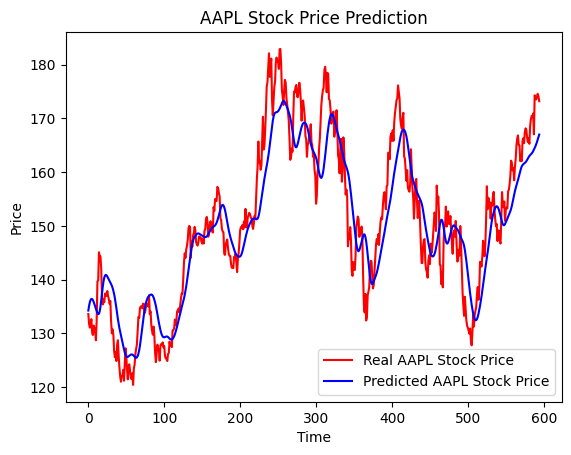

In [ ]:
#LSTM results
#ploting the graph
plt.plot(test_set, color='red',label='Real AAPL Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#errors calculation
#MSE
mse = mean_squared_error(test_set, predicted_stock_price)
print("The mean squared error is {}.".format(round(mse, 2)))
#RMSE
rmse = math.sqrt(mean_squared_error(test_set, predicted_stock_price))
print("The root mean squared error is {}.".format(round(rmse, 2)))

#MAE
score = mean_absolute_error(test_set, predicted_stock_price)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The mean squared error is 37.96.
The root mean squared error is 6.16.
The Mean Absolute Error of our Model is 5.03


In [ ]:
#Accuracy using R2 score
LSTM_score = r2_score(test_set, predicted_stock_price)
print("The accuracy of LSTM model is {}%".format(round(LSTM_score, 2) *100))

The accuracy of LSTM model is (0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8377577730713371, 2, 0.8

**GRU model**

In [ ]:
#train the GRU model

In [ ]:
#GRU_ Architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
26/26 [==============================] - 17s 310ms/step - loss: 0.0349
Epoch 2/50
26/26 [==============================] - 9s 329ms/step - loss: 0.0202
Epoch 3/50
26/26 [==============================] - 9s 340ms/step - loss: 0.0089
Epoch 4/50
26/26 [==============================] - 8s 291ms/step - loss: 0.0020
Epoch 5/50
26/26 [==============================] - 9s 327ms/step - loss: 0.0012
Epoch 6/50
26/26 [==============================] - 9s 347ms/step - loss: 0.0011
Epoch 7/50
26/26 [==============================] - 8s 300ms/step - loss: 0.0012
Epoch 8/50
26/26 [==============================] - 9s 340ms/step - loss: 0.0010
Epoch 9/50
26/26 [==============================] - 9s 342ms/step - loss: 0.0012
Epoch 10/50
26/26 [==============================] - 8s 293ms/step - loss: 0.0011
Epoch 11/50
26/26 [==============================] - 9s 348ms/step - loss: 0.0010
Epoch 12/50
26/26 [==============================] - 9s 339ms/step - loss: 9.8849e-04
Epoch 13/50
26/26 [=

In [ ]:
X_test = []
for i in range(60,input_len):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

19/19 [==============================] - 2s 35ms/step


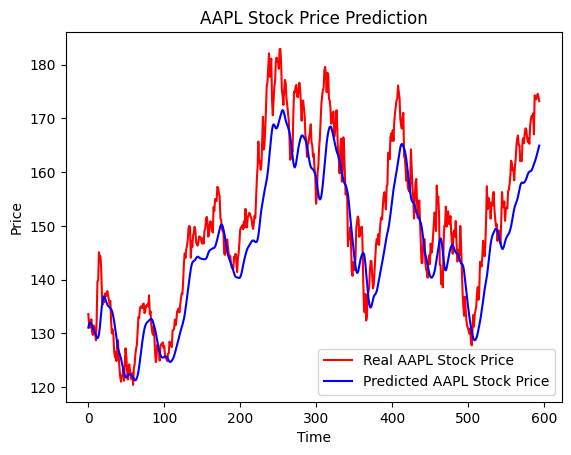

In [ ]:
#GRU results
#ploting the graph
plt.plot(test_set, color='red',label='Real AAPL Stock Price')
plt.plot(GRU_predicted_stock_price, color='blue',label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#errors calculation
#MSE
mse = mean_squared_error(test_set, GRU_predicted_stock_price)
print("The mean squared error is {}.".format(round(mse, 2)))

#RMSE
rmse = math.sqrt(mean_squared_error(test_set, GRU_predicted_stock_price))
print("The root mean squared error is {}.".format(round(rmse, 2)))

#MAE
score = mean_absolute_error(test_set, GRU_predicted_stock_price)
print("The Mean Absolute Error of GRU Model is {}".format(round(score, 2)))

The mean squared error is 49.89.
The root mean squared error is 7.06.
The Mean Absolute Error of GRU Model is 5.75


In [ ]:
#Accuracy using R2 score
GRU_score = r2_score(test_set, GRU_predicted_stock_price)
print("The accuracy of GRU model is {}%".format(round(GRU_score, 2) *100))

The accuracy of GRU model is 79.0%
